Encuentre todos los puntos en los que la curva $(\frac{y}{2})^2 = (\frac{x+3}{2})^2 -1$ interseca el eje $y=-2$

C:\Users\PcUser\AppData\Local\Temp\ipykernel_80812\2080445890.py:8: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((x + 3)**2 - 4) - 2


Raíz encontrada con bisección: x ≈ -5.828427
 Animación guardada como 'newton_animacion.gif'


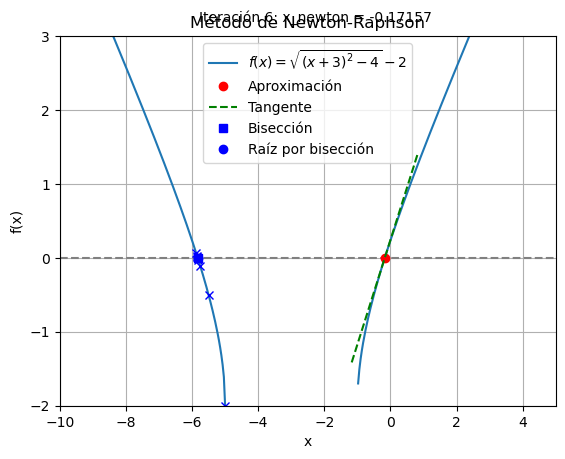

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.optimize import newton

# === Definir función y derivada ===
def f(x):
    return np.sqrt((x + 3)**2 - 4) - 2

def f_prime(x):
    return (x + 3) / np.sqrt((x + 3)**2 - 4)

# === Generar puntos del método de Newton ===
x0 = -0.5
steps = [x0]

# Guardar iteraciones
for _ in range(6):
    x_n = steps[-1]
    x_next = x_n - f(x_n) / f_prime(x_n)
    steps.append(x_next)

# === Preparar el gráfico base ===
x_vals = np.linspace(-10, 5, 400)
y_vals = f(x_vals)

fig, ax = plt.subplots()
ax.plot(x_vals, y_vals, label=r"$f(x) = \sqrt{(x+3)^2 - 4} - 2$")
ax.axhline(0, color='gray', linestyle='--')
ax.set_xlim(-10, 5)
ax.set_ylim(-2, 3)
ax.set_title("Método de Newton-Raphson")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.grid(True)
ax.legend()

# Elementos actualizables
punto, = ax.plot([], [], 'ro', label='Aproximación')
tangente, = ax.plot([], [], 'g--', label='Tangente')
punto_bis, = ax.plot([], [], 'bs', label='Bisección')  # punto azul con forma de cuadrado
texto = ax.text(-5.8, 3.2, '', fontsize=10)

# === Función para actualizar cada frame ===
def update(frame):
    elements = []

    # --- Newton-Raphson ---
    if frame < len(steps):
        x_newton = steps[frame]
        y_newton = f(x_newton)
        punto.set_data([x_newton], [y_newton])
        elements.append(punto)

        # Tangente de Newton
        m = f_prime(x_newton)
        x_tan = np.linspace(x_newton - 1, x_newton + 1, 100)
        y_tan = m * (x_tan - x_newton) + y_newton
        tangente.set_data(x_tan, y_tan)
        elements.append(tangente)

        texto.set_text(f"Iteración {frame}: x_newton = {x_newton:.5f}")
        elements.append(texto)

    # --- Bisección ---
    if frame < len(pasos_bis):
        x_bis = pasos_bis[frame]
        y_bis = f(x_bis)
        punto_bis.set_data([x_bis], [y_bis])
        elements.append(punto_bis)

    return elements

# === Método de Bisección ===
def biseccion(f, a, b, tol=1e-6, max_iter=50):
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) y f(b) no tienen signos opuestos")

    pasos_biseccion = []
    for i in range(max_iter):
        c = (a + b) / 2
        pasos_biseccion.append(c)
        if abs(f(c)) < tol or (b - a) / 2 < tol:
            break
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return c, pasos_biseccion

# Buscar otra raíz en [-6, -4]
raiz_bis, pasos_bis = biseccion(f, -6, -4)
print(f"Raíz encontrada con bisección: x ≈ {raiz_bis:.6f}")

for i, x_b in enumerate(pasos_bis):
    ax.plot(x_b, f(x_b), 'bx')  # puntos azules en cada paso
ax.plot(raiz_bis, f(raiz_bis), 'bo', label='Raíz por bisección')
ax.legend()


# === Crear y guardar animación ===
num_frames = max(len(steps), len(pasos_bis))
ani = FuncAnimation(fig, update, frames=num_frames, interval=1000, blit=True)

# Guardar como .gif
ani.save(r"C:\Users\PcUser\OneDrive - Escuela Politécnica Nacional\Escritorio\Miguel Robles\4to\Metodos_ numericos\Laboratorios\LAboratorios grupales\lab2\TALLERERS_MN\TALLER_02newton_animacion.gif", writer=PillowWriter(fps=1))



print(" Animación guardada como 'newton_animacion.gif'")
